In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Data-Collisions.csv")

df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)

In [4]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [5]:
X = df.drop(columns=['SEVERITYCODE'], axis=1)
Y = df['SEVERITYCODE']

In [6]:
X_under,Y_under = undersample.fit_resample(X,Y)

In [7]:
X = X_under 
y = Y_under

In [65]:
df1['SPEEDING'].fillna(0, inplace=True)
df1['SPEEDING'].replace('Y', 1, inplace=True)

df1['SPEEDING'].value_counts()

0    110335
1      6017
Name: SPEEDING, dtype: int64

In [66]:
df1['PEDROWNOTGRNT'].replace('Y', 1, inplace=True)
df1['PEDROWNOTGRNT'].fillna(0, inplace=True)

df1['PEDROWNOTGRNT'].value_counts()

0.0    111955
1.0      4397
Name: PEDROWNOTGRNT, dtype: int64

In [67]:
df1['UNDERINFL'].replace('N', 0, inplace=True)
df1['UNDERINFL'].fillna(0, inplace=True)

df1['UNDERINFL'].value_counts()

0    63180
0    47181
Y     3341
1     2650
Name: UNDERINFL, dtype: int64

In [68]:
df1['HITPARKEDCAR'].replace('N', 0, inplace=True)
df1['HITPARKEDCAR'].replace('Y', 1, inplace=True)

df1['HITPARKEDCAR'].value_counts()

0    113032
1      3320
Name: HITPARKEDCAR, dtype: int64

In [69]:
df1['WEATHER']= X['WEATHER'].astype('category').cat.codes

df1['WEATHER'].value_counts()

df1['WEATHER'].replace('-1', 11, inplace=True)

In [13]:
import matplotlib.pyplot as plt

In [14]:
df1= X 

df1['SEVERITYCODE'] = Y

df1 

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITYCODE
0,-122.317446,47.605198,102640,118333,118333,3386719,Matched,Block,NaN,E TERRACE ST BETWEEN 11TH AVE AND 12TH AVE,...,Dark - Street Lights On,0.0,10324028.0,0,32,One parked--one moving,0,0,0,2
1,-122.277276,47.550425,120733,133712,133712,3502107,Matched,Intersection,33517.0,RAINIER AVE S AND S MEAD ST,...,Daylight,0.0,12342037.0,0,10,Entering at angle,0,0,0,1
2,-122.321146,47.635473,29176,42898,42898,1198833,Matched,Block,NaN,BROADWAY E BETWEEN E BLAINE ST AND E HOWE ST,...,Dark - Street Lights On,0.0,5163026.0,0,32,One parked--one moving,0,0,0,1
3,-122.378160,47.573131,105984,120224,120224,3553326,Matched,Intersection,31834.0,37TH AVE SW AND SW HINDS ST,...,Dusk,0.0,11316005.0,0,10,Entering at angle,0,0,0,1
4,-122.331703,47.628375,78550,93898,93898,3282525,Matched,Block,NaN,FAIRVIEW NR AVE N BETWEEN WARD ST AND YALE AVE N,...,Daylight,0.0,9105004.0,0,32,One parked--one moving,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,-122.299160,47.579673,219536,309335,310615,E880807,Matched,Block,NaN,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,...,Daylight,0.0,NaN,0,10,Entering at angle,0,0,0,1
116348,-122.344569,47.694547,219539,309170,310450,E879712,Matched,Block,NaN,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,...,Daylight,0.0,NaN,0,10,Entering at angle,0,0,0,2
116349,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,...,Daylight,0.0,NaN,0,24,From opposite direction - both moving - head-on,0,0,0,1
116350,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,...,Daylight,0.0,NaN,0,28,From opposite direction - one left turn - one ...,0,0,0,2


In [15]:
import matplotlib.pyplot as plt

In [70]:
df1

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITYCODE
0,-122.317446,47.605198,102640,118333,118333,3386719,Matched,1,NaN,E TERRACE ST BETWEEN 11TH AVE AND 12TH AVE,...,2,0.0,10324028.0,0,32,One parked--one moving,0,0,0,2
1,-122.277276,47.550425,120733,133712,133712,3502107,Matched,2,33517.0,RAINIER AVE S AND S MEAD ST,...,3,0.0,12342037.0,0,10,Entering at angle,0,0,0,1
2,-122.321146,47.635473,29176,42898,42898,1198833,Matched,1,NaN,BROADWAY E BETWEEN E BLAINE ST AND E HOWE ST,...,2,0.0,5163026.0,0,32,One parked--one moving,0,0,0,1
3,-122.378160,47.573131,105984,120224,120224,3553326,Matched,2,31834.0,37TH AVE SW AND SW HINDS ST,...,3,0.0,11316005.0,0,10,Entering at angle,0,0,0,1
4,-122.331703,47.628375,78550,93898,93898,3282525,Matched,1,NaN,FAIRVIEW NR AVE N BETWEEN WARD ST AND YALE AVE N,...,2,0.0,9105004.0,0,32,One parked--one moving,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,-122.299160,47.579673,219536,309335,310615,E880807,Matched,1,NaN,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,...,2,0.0,NaN,0,10,Entering at angle,0,0,0,1
116348,-122.344569,47.694547,219539,309170,310450,E879712,Matched,1,NaN,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,...,2,0.0,NaN,0,10,Entering at angle,0,0,0,2
116349,-122.290826,47.565408,219543,309534,310814,E871089,Matched,1,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,...,2,0.0,NaN,0,24,From opposite direction - both moving - head-on,0,0,0,1
116350,-122.306689,47.683047,219545,311280,312640,3809984,Matched,2,24760.0,20TH AVE NE AND NE 75TH ST,...,3,0.0,NaN,0,28,From opposite direction - one left turn - one ...,0,0,0,2


In [73]:
plt.close('all')

df1['WEATHER'].value_counts()

2     67829
7     20575
5     16887
11     6915
0      2753
10      482
4       434
3       350
9        72
1        39
8        12
6         4
Name: WEATHER, dtype: int64

In [74]:
df['WEATHER'].value_counts()

Clear                       110774
Raining                      33016
Overcast                     27616
Unknown                      15032
Snowing                        901
Other                          830
Fog/Smog/Smoke                 565
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

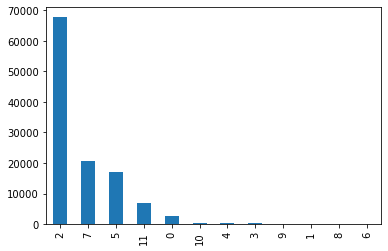

In [72]:
pd.value_counts(df1.WEATHER).plot.bar()

In [75]:
df1['WEATHER'].groupby(df['SEVERITYCODE']).plot(kind='bar')
plt.ylabel('state')

Text(0, 0.5, 'state')

Error in callback <function flush_figures at 0x000001F4AE3195E8> (for post_execute):


KeyboardInterrupt: 

In [21]:
df.groupby('SEVERITYCODE')['WEATHER'].nunique().plot(kind='scatter')
plt.show()

ValueError: plot kind scatter can only be used for data frames

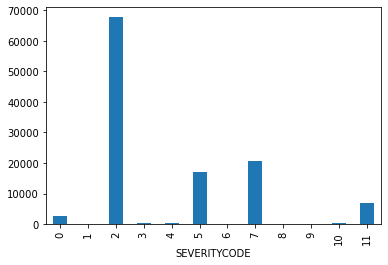

In [88]:
df1.groupby('WEATHER')['SEVERITYCODE'].count().plot(kind='bar')
plt.xlabel('SEVERITYCODE')
plt.show()

Text(0, 0.5, 'Collsion Count')

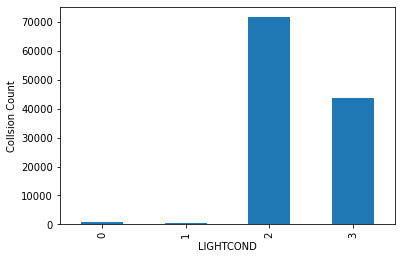

In [98]:
df1.groupby('LIGHTCOND')['LIGHTCOND'].count().plot(kind='bar')
plt.ylabel('Collsion Count')

In [97]:
df['LIGHTCOND'].value_counts()

Daylight                    115747
Dark - Street Lights On      48330
Unknown                      13433
Dusk                          5873
Dawn                          2488
Dark - No Street Lights       1531
Dark - Street Lights Off      1197
Other                          234
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

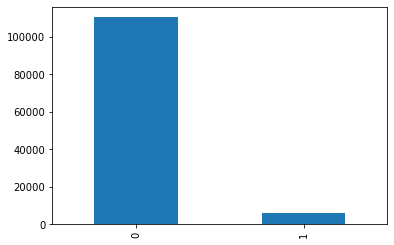

In [24]:
pd.value_counts(df1.SPEEDING).plot.bar()

Text(0, 0.5, 'SPEEDING Count')

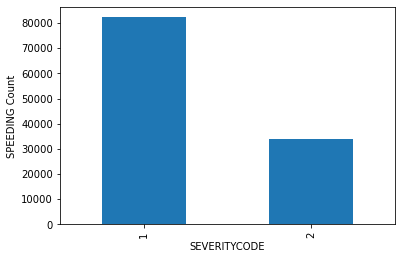

In [25]:
df1.groupby('SEVERITYCODE')['SPEEDING'].count().plot(kind='bar')
plt.ylabel('SPEEDING Count')

Text(0, 0.5, 'UNDERINFL')

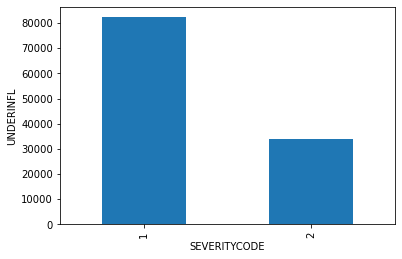

In [57]:
df1.groupby('SEVERITYCODE')['UNDERINFL'].count().plot(kind='bar')
plt.ylabel('UNDERINFL')

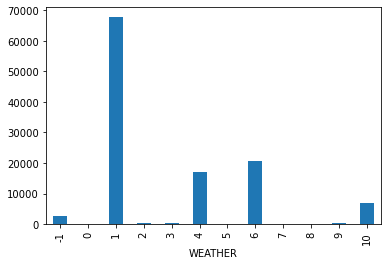

In [63]:
df1.groupby('WEATHER')['WEATHER'].count().plot(kind='bar')
#plt.ylabel('UNDERINFL')

In [59]:
df1[['ST_COLCODE']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

TypeError: no numeric data to plot

In [60]:
df1['ST_COLCODE'].value_counts()

10    15290
32    12575
14    11388
32     7553
10     7245
      ...  
67        1
87        1
43        1
87        1
49        1
Name: ST_COLCODE, Length: 112, dtype: int64

In [19]:
df1['ADDRTYPE']= df1['ADDRTYPE'].astype('category').cat.codes

df1['ADDRTYPE'].value_counts()

df1['ADDRTYPE'].replace('-1', 3, inplace=True)

In [20]:
df1['LIGHTCOND']= df1['ADDRTYPE'].astype('category').cat.codes

df1['LIGHTCOND'].value_counts()

#df1['LIGHTCOND'].replace('-1', 3, inplace=True)

2    71507
3    43563
0      912
1      370
Name: LIGHTCOND, dtype: int64

In [21]:
df1['ROADCOND']= df1['ROADCOND'].astype('category').cat.codes

df1['ROADCOND'].value_counts()

df1['ROADCOND'].replace('-1', 9, inplace=True)

In [22]:
df1

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITYCODE
0,-122.317446,47.605198,102640,118333,118333,3386719,Matched,1,NaN,E TERRACE ST BETWEEN 11TH AVE AND 12TH AVE,...,2,0.0,10324028.0,0,32,One parked--one moving,0,0,0,2
1,-122.277276,47.550425,120733,133712,133712,3502107,Matched,2,33517.0,RAINIER AVE S AND S MEAD ST,...,3,0.0,12342037.0,0,10,Entering at angle,0,0,0,1
2,-122.321146,47.635473,29176,42898,42898,1198833,Matched,1,NaN,BROADWAY E BETWEEN E BLAINE ST AND E HOWE ST,...,2,0.0,5163026.0,0,32,One parked--one moving,0,0,0,1
3,-122.378160,47.573131,105984,120224,120224,3553326,Matched,2,31834.0,37TH AVE SW AND SW HINDS ST,...,3,0.0,11316005.0,0,10,Entering at angle,0,0,0,1
4,-122.331703,47.628375,78550,93898,93898,3282525,Matched,1,NaN,FAIRVIEW NR AVE N BETWEEN WARD ST AND YALE AVE N,...,2,0.0,9105004.0,0,32,One parked--one moving,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,-122.299160,47.579673,219536,309335,310615,E880807,Matched,1,NaN,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,...,2,0.0,NaN,0,10,Entering at angle,0,0,0,1
116348,-122.344569,47.694547,219539,309170,310450,E879712,Matched,1,NaN,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,...,2,0.0,NaN,0,10,Entering at angle,0,0,0,2
116349,-122.290826,47.565408,219543,309534,310814,E871089,Matched,1,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,...,2,0.0,NaN,0,24,From opposite direction - both moving - head-on,0,0,0,1
116350,-122.306689,47.683047,219545,311280,312640,3809984,Matched,2,24760.0,20TH AVE NE AND NE 75TH ST,...,3,0.0,NaN,0,28,From opposite direction - one left turn - one ...,0,0,0,2


In [23]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [24]:
y = df1['SEVERITYCODE']

In [25]:
df1.dtypes

X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE             int8
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER              int8
ROADCOND             int8
LIGHTCOND            int8
PEDROWNOTGRNT     float64
SDOTCOLNUM        float64
SPEEDING            int64
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR        int64
SEVERITYCODE        int64
dtype: objec

In [48]:
from sklearn.preprocessing import MinMaxScaler

df3 = df1[['LIGHTCOND','ROADCOND','HITPARKEDCAR', 'WEATHER', 'PEDROWNOTGRNT', 'SPEEDING', 'PEDCOUNT', 'VEHCOUNT']] 

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df3) 
df3.loc[:,:] = scaled_values

df3

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,LIGHTCOND,ROADCOND,HITPARKEDCAR,WEATHER,PEDROWNOTGRNT,SPEEDING,PEDCOUNT,VEHCOUNT
0,0.666667,0.111111,0.0,0.181818,0.0,0.0,0.0,0.166667
1,1.000000,0.111111,0.0,0.181818,0.0,0.0,0.0,0.166667
2,0.666667,1.000000,0.0,0.636364,0.0,0.0,0.0,0.166667
3,1.000000,1.000000,0.0,0.636364,0.0,0.0,0.0,0.166667
4,0.666667,0.111111,0.0,0.181818,0.0,0.0,0.0,0.166667
...,...,...,...,...,...,...,...,...
116347,0.666667,1.000000,0.0,0.636364,0.0,0.0,0.0,0.166667
116348,0.666667,1.000000,0.0,0.181818,0.0,0.0,0.0,0.166667
116349,0.666667,0.111111,0.0,0.181818,0.0,0.0,0.0,0.166667
116350,1.000000,0.111111,0.0,0.181818,0.0,0.0,0.0,0.166667


In [49]:
#columns = 'LIGHTCOND','ROADCOND','HITPARKEDCAR', 'WEATHER', 'PEDROWNOTGRNT', 'SPEEDING', 'PEDCOUNT', 'VEHCOUNT'

#columns ='LIGHTCOND','ROADCOND','HITPARKEDCAR', 'WEATHER', 'PEDROWNOTGRNT', 'SPEEDING', 'PEDCOUNT', 'VEHCOUNT'
#df2 = pd.DataFrame(df1, columns=columns)

from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(93081, 8) (93081,)
(23271, 8) (23271,)


In [31]:
X_train

,LIGHTCOND,ROADCOND,HITPARKEDCAR,WEATHER,PEDROWNOTGRNT,SPEEDING,PEDCOUNT,VEHCOUNT
58615,0.666667,0.111111,0.0,0.181818,0.0,0.0,0.000000,0.166667
64350,0.666667,1.000000,0.0,0.636364,0.0,1.0,0.000000,0.166667
104957,1.000000,0.111111,0.0,0.181818,0.0,0.0,0.000000,0.166667
84300,1.000000,1.000000,0.0,0.454545,0.0,0.0,0.166667,0.083333
55850,0.666667,0.111111,0.0,0.181818,0.0,0.0,0.000000,0.166667
...,...,...,...,...,...,...,...,...
54437,1.000000,0.111111,0.0,0.181818,0.0,0.0,0.000000,0.166667
8817,1.000000,0.111111,0.0,0.181818,0.0,0.0,0.166667,0.166667
3679,0.666667,1.000000,0.0,0.636364,0.0,0.0,0.000000,0.166667
56142,0.666667,1.000000,0.0,0.636364,0.0,0.0,0.000000,0.166667


In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
kmodel = knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [33]:
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
from sklearn import metrics

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [37]:
LR_fit = LR.fit(X_train, y_train)
KNN_fit = KNN.fit(X_train, y_train)
NB_fit = NB.fit(X_train, y_train)
#LSVM_fit = LSVM.fit(X_train, y_train)
#NLSVM_fit = NLSVM.fit(X_train, y_train)
DT_fit = DT.fit(X_train, y_train)
RF_fit = RF.fit(X_train, y_train)

In [38]:
LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
#LSVM_pred = LSVM_fit.predict(X_test)
#NLSVM_pred = NLSVM_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
#RF_pred = RF_fit.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

print("the accuracy score of Logistic Regression -->", accuracy_score(LR_pred, y_test)*100)
print("the accuracy score of K nearest neighebors -->", accuracy_score(KNN_pred, y_test)*100)
print("the accuracy score of Naive Bayes -->", accuracy_score(NB_pred, y_test)*100)
print("the accuracy score of Decision Tree -->", accuracy_score(DT_pred, y_test)*100)
print("the accuracy score of Random Forest -->", accuracy_score(RF_pred, y_test)*100)

the accuracy score of Logistic Regression --> 70.27201237591852
the accuracy score of K nearest neighebors --> 67.35851488977698
the accuracy score of Naive Bayes --> 69.93683124919427
the accuracy score of Decision Tree --> 70.13450217008294
the accuracy score of Random Forest --> 70.12161058828585


In [40]:
RF_fit = RF.fit(X_train, y_train)

RF_pred = RF_fit.predict(X_test)